# Decoding Health Patterns with Advanced Neural Networks for Stroke Prediction

### Introduction

**In this project focused on predicting strokes, advanced artificial neural networks (ANNs) are employed to build a model that assesses the likelihood of individuals experiencing a stroke. Using a dataset with diverse health-related features, the goal is to utilize deep learning to uncover intricate patterns and relationships within the data. Through training an ANN model, the project aims to create a robust predictive tool capable of accurately identifying potential stroke risks. Evaluation metrics such as the Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUC) will be applied to gauge the model's performance, ensuring a comprehensive assessment of its predictive accuracy and reliability. This project emphasizes the utilization of cutting-edge deep learning techniques to improve stroke prediction, contributing to more effective preventive healthcare strategies.**

#### Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#### Load Dataset

In [2]:
df = pd.read_csv('/content/sample_data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Exploration

In [ ]:
df.shape

(5110, 12)

The dataset consists of 5110 rows and 12 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()}')

id : 5110
gender : 3
age : 104
hypertension : 2
heart_disease : 2
ever_married : 2
work_type : 5
Residence_type : 2
avg_glucose_level : 3979
bmi : 418
smoking_status : 4
stroke : 2


In [ ]:
for i in df.columns:
    print(f'{i} : {df[i].unique()}')

id : [ 9046 51676 31112 ... 19723 37544 44679]
gender : ['Male' 'Female' 'Other']
age : [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02

### Data Cleaning

In [3]:
# Check null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Here, bmi column has 201 null values.

In [4]:
# Drop null values
df1 = df.dropna()

In [5]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
# check dupicate rows
df1.duplicated().sum()

0

Datset does not have any null values or duplicated values (we already know duplicated values wont be there as we have 5110 unqiue id).

In [7]:
df1.shape

(4909, 12)

In [8]:
# Convert age column to int
df1['age'] = df1['age'].apply(lambda x: float(x))

<ipython-input-8-3ceef827dd40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1['age'].apply(lambda x: float(x))


In [9]:
df1['age'] = df1['age'].astype(int)
df1.head()

<ipython-input-9-ab241b418457>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = df1['age'].astype(int)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Feature Engineering

In [10]:
# Add new feature
def categorize_bmi(bmi_value):
    if bmi_value < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi_value <= 24.9:
        return 'Normal Weight'
    elif 25 <= bmi_value <= 29.9:
        return 'Overweight'
    elif 30 <= bmi_value <= 34.9:
        return 'Class I Obesity'
    elif 35 <= bmi_value <= 39.9:
        return 'Class II Obesity'
    elif bmi_value >= 40:
        return 'Class III Obesity'
    else:
        return None  # Handle any unexpected values or NaNs

df1['bmi_category'] = df1['bmi'].apply(categorize_bmi)

<ipython-input-10-82ccd16e92b0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bmi_category'] = df1['bmi'].apply(categorize_bmi)


In [11]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Class II Obesity
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Class I Obesity
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Class I Obesity
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal Weight
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Overweight


### Exploratory Data Analysis

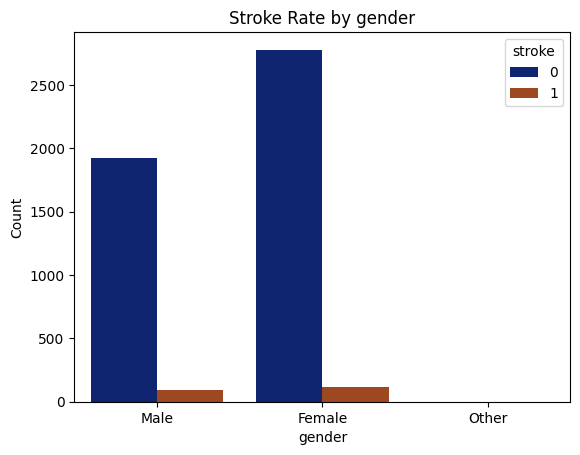

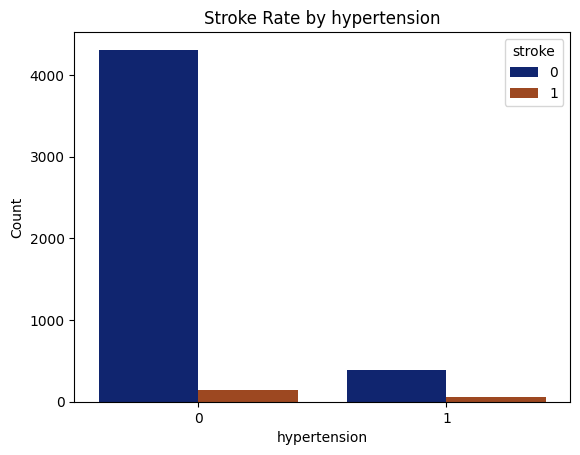

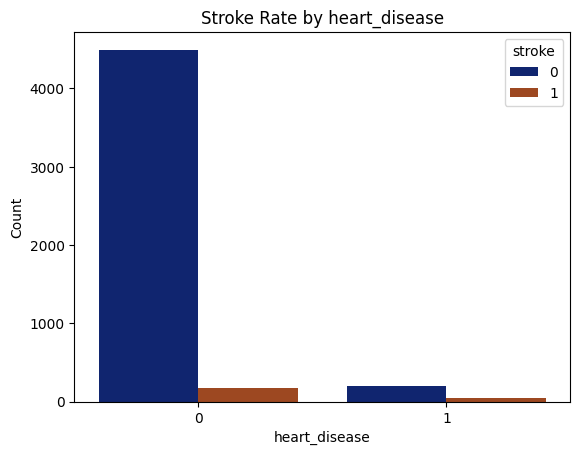

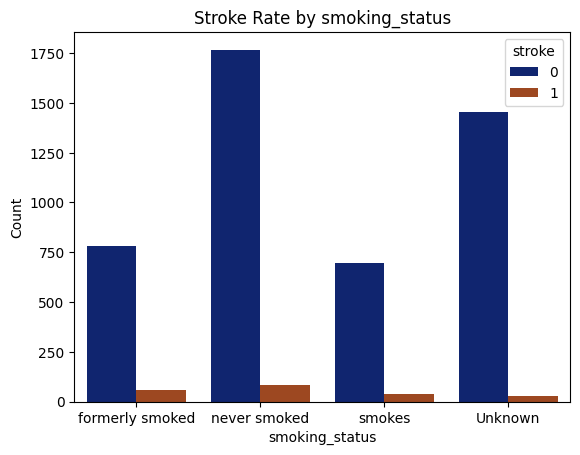

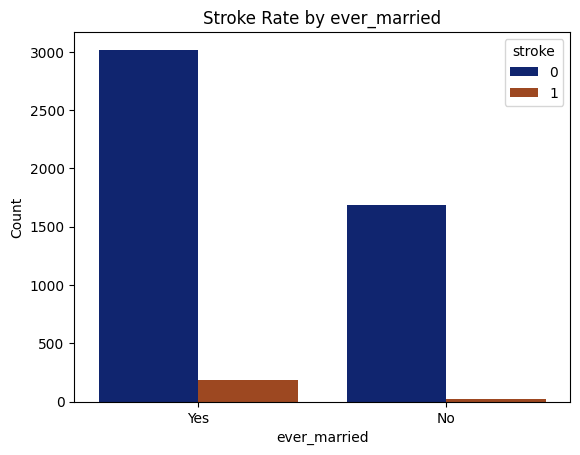

In [ ]:
x = ['gender', 'hypertension', 'heart_disease', 'smoking_status', 'ever_married' ]
for i in x:
    sns.countplot(x=i, hue='stroke', data=df1, palette='dark')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Stroke Rate by {i}')
    plt.show()

Analyzing stroke rates across genders reveals that females have a higher incidence of strokes compared to males. While men also exhibit a stroke rate, it is slightly lower than that of females. Additionally, the 'Others' category does not show any recorded instances of stroke, suggesting a lower or zero stroke rate in this group.

In the context of stroke rates categorized by hypertension, individuals with low hypertension levels tend to have fewer strokes than those with hypertension.

In the context of stroke rates categorized by heart disease, individuals without a history of heart disease tend to experience strokes at a higher rate than those with a history of heart disease.

In the analysis of stroke rates based on smoking status, individuals who have never smoked exhibit a higher occurrence of strokes, followed by those who formerly smoked. Subsequently, individuals who currently smoke show a lower stroke rate, and those with unknown smoking status have the lowest incidence of strokes.

In the analysis of stroke rates based on marital status, it is observed that married individuals tend to exhibit a higher stroke rate compared to those who are unmarried.

<ipython-input-59-783026df0ce1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y=i, data=df1, ci=None, palette='dark')
<ipython-input-59-783026df0ce1>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y=i, data=df1, ci=None, palette='dark')


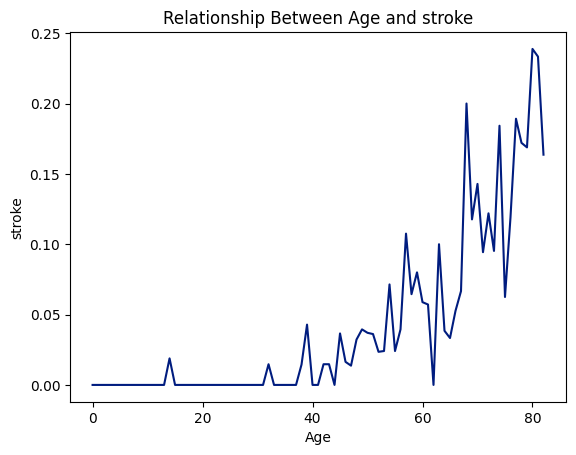

<ipython-input-59-783026df0ce1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y=i, data=df1, ci=None, palette='dark')
<ipython-input-59-783026df0ce1>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y=i, data=df1, ci=None, palette='dark')


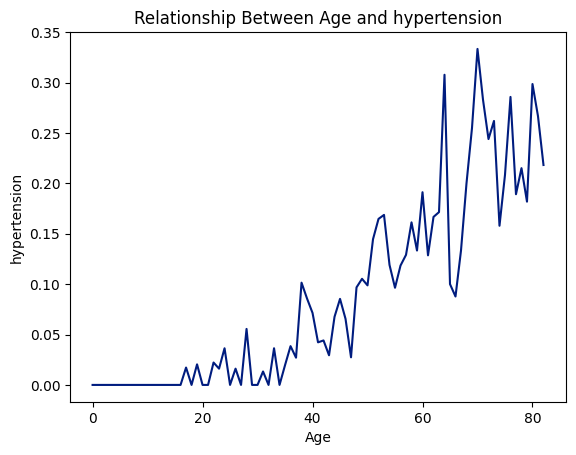

<ipython-input-59-783026df0ce1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y=i, data=df1, ci=None, palette='dark')
<ipython-input-59-783026df0ce1>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y=i, data=df1, ci=None, palette='dark')


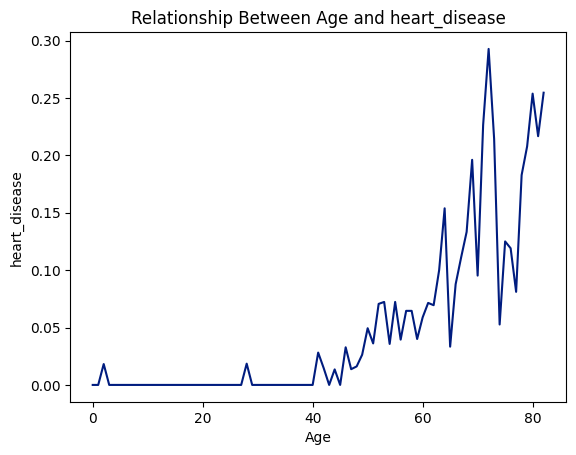

In [ ]:
y = ['stroke', 'hypertension', 'heart_disease']
for i in y:
    sns.set_palette('dark')
    sns.lineplot(x='age', y=i, data=df1, ci=None, palette='dark')
    plt.xlabel('Age')
    plt.ylabel(i)
    plt.title(f'Relationship Between Age and {i}')
    plt.show()

As age increases, there is a corresponding rise in the rates of stroke, hypertension, and heart disease. This suggests a potential age-related association with these health conditions, emphasizing the importance of age-aware healthcare strategies and preventive measures.

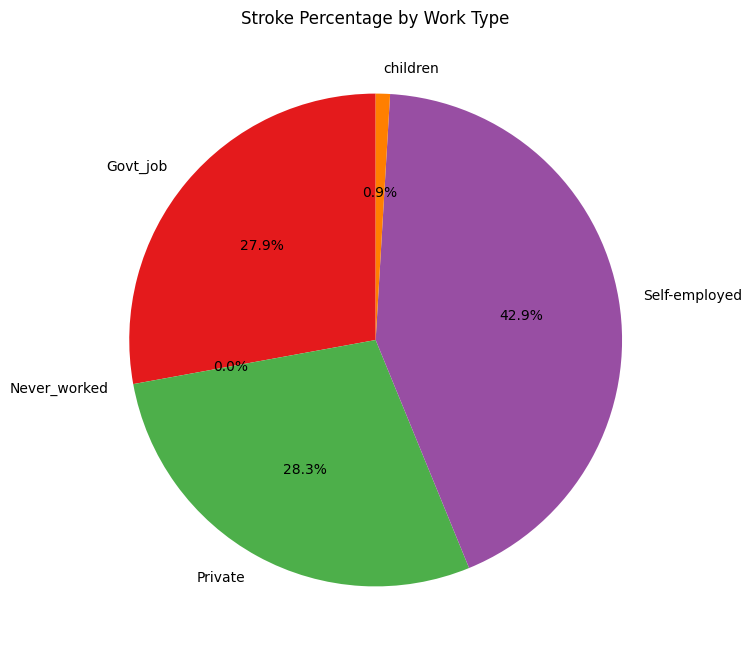

In [ ]:
stroke_percentage = df1.groupby('work_type')['stroke'].mean() * 100
plt.figure(figsize=(8, 8))
plt.pie(stroke_percentage, labels=stroke_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title('Stroke Percentage by Work Type')
plt.show()

Analyzing the pie chart reveals varying stroke rates across different work types. Notably, self-employed individuals exhibit the highest stroke rate at 42.9%, followed by those in the private sector with 28.3%. Government job holders closely follow with a stroke rate of 27.9%. The stroke rate is significantly lower for children at 0.9%, and individuals who have never worked show a 0% stroke rate. These insights underscore the importance of considering occupational factors when assessing stroke risk within different demographic groups.

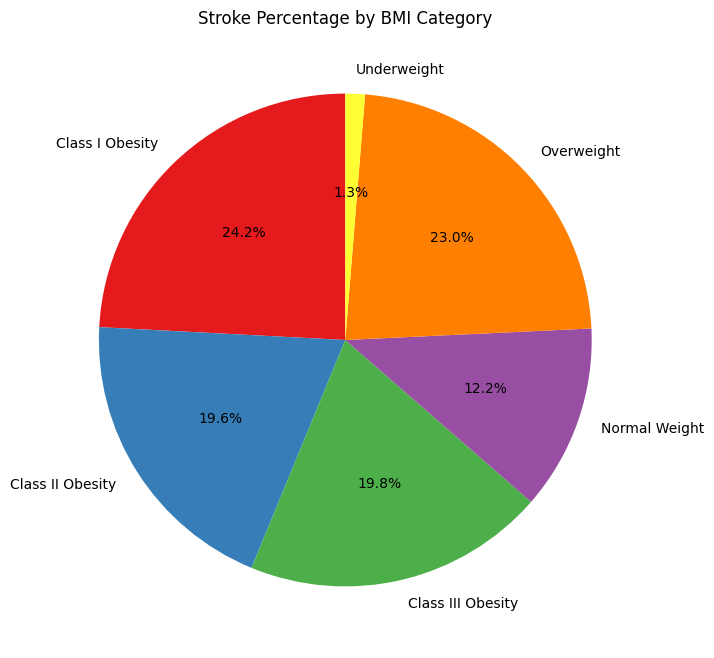

In [ ]:
stroke_percentage = df1.groupby('bmi_category')['stroke'].mean() * 100
plt.figure(figsize=(8, 8))
plt.pie(stroke_percentage, labels=stroke_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title('Stroke Percentage by BMI Category')
plt.show()

When analyzing the stroke rate by BMI category, individuals classified as Class I Obesity exhibit a higher stroke rate compared to other categories, accounting for 24.2%. Following closely, the overweight category shows a stroke rate of 23.0%. Subsequently, Class III Obesity and Class II Obesity report stroke rates of 19.8% and 19.6%, respectively. Normal Weight individuals display a lower stroke rate at 12.2%, while the Underweight category has the lowest stroke rate at 1.3%.

<ipython-input-62-ff54eea0e050>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Residence_type', y='stroke', data=df1, estimator=sum, ci=None, palette='viridis')


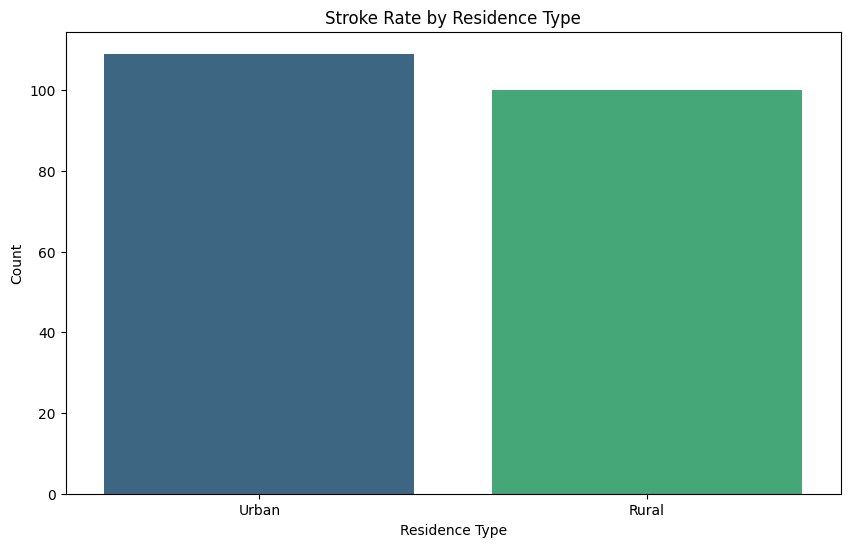

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Residence_type', y='stroke', data=df1, estimator=sum, ci=None, palette='viridis')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.title('Stroke Rate by Residence Type')
plt.show()

Analyzing stroke rates by residence type reveals a higher incidence of strokes among individuals living in urban areas compared to those in rural areas. The difference is notable, with rural areas closely following, though with a slightly lower stroke rate. These findings underscore the potential impact of residence type on stroke risk within the analyzed population.

### Data Preprocessing

In [ ]:
# Drop column bmi category
df1.drop('bmi_category', axis=1, inplace=True)
df1.head()

<ipython-input-63-79c557c25a64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('bmi_category', axis=1, inplace=True)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Outlier Removal

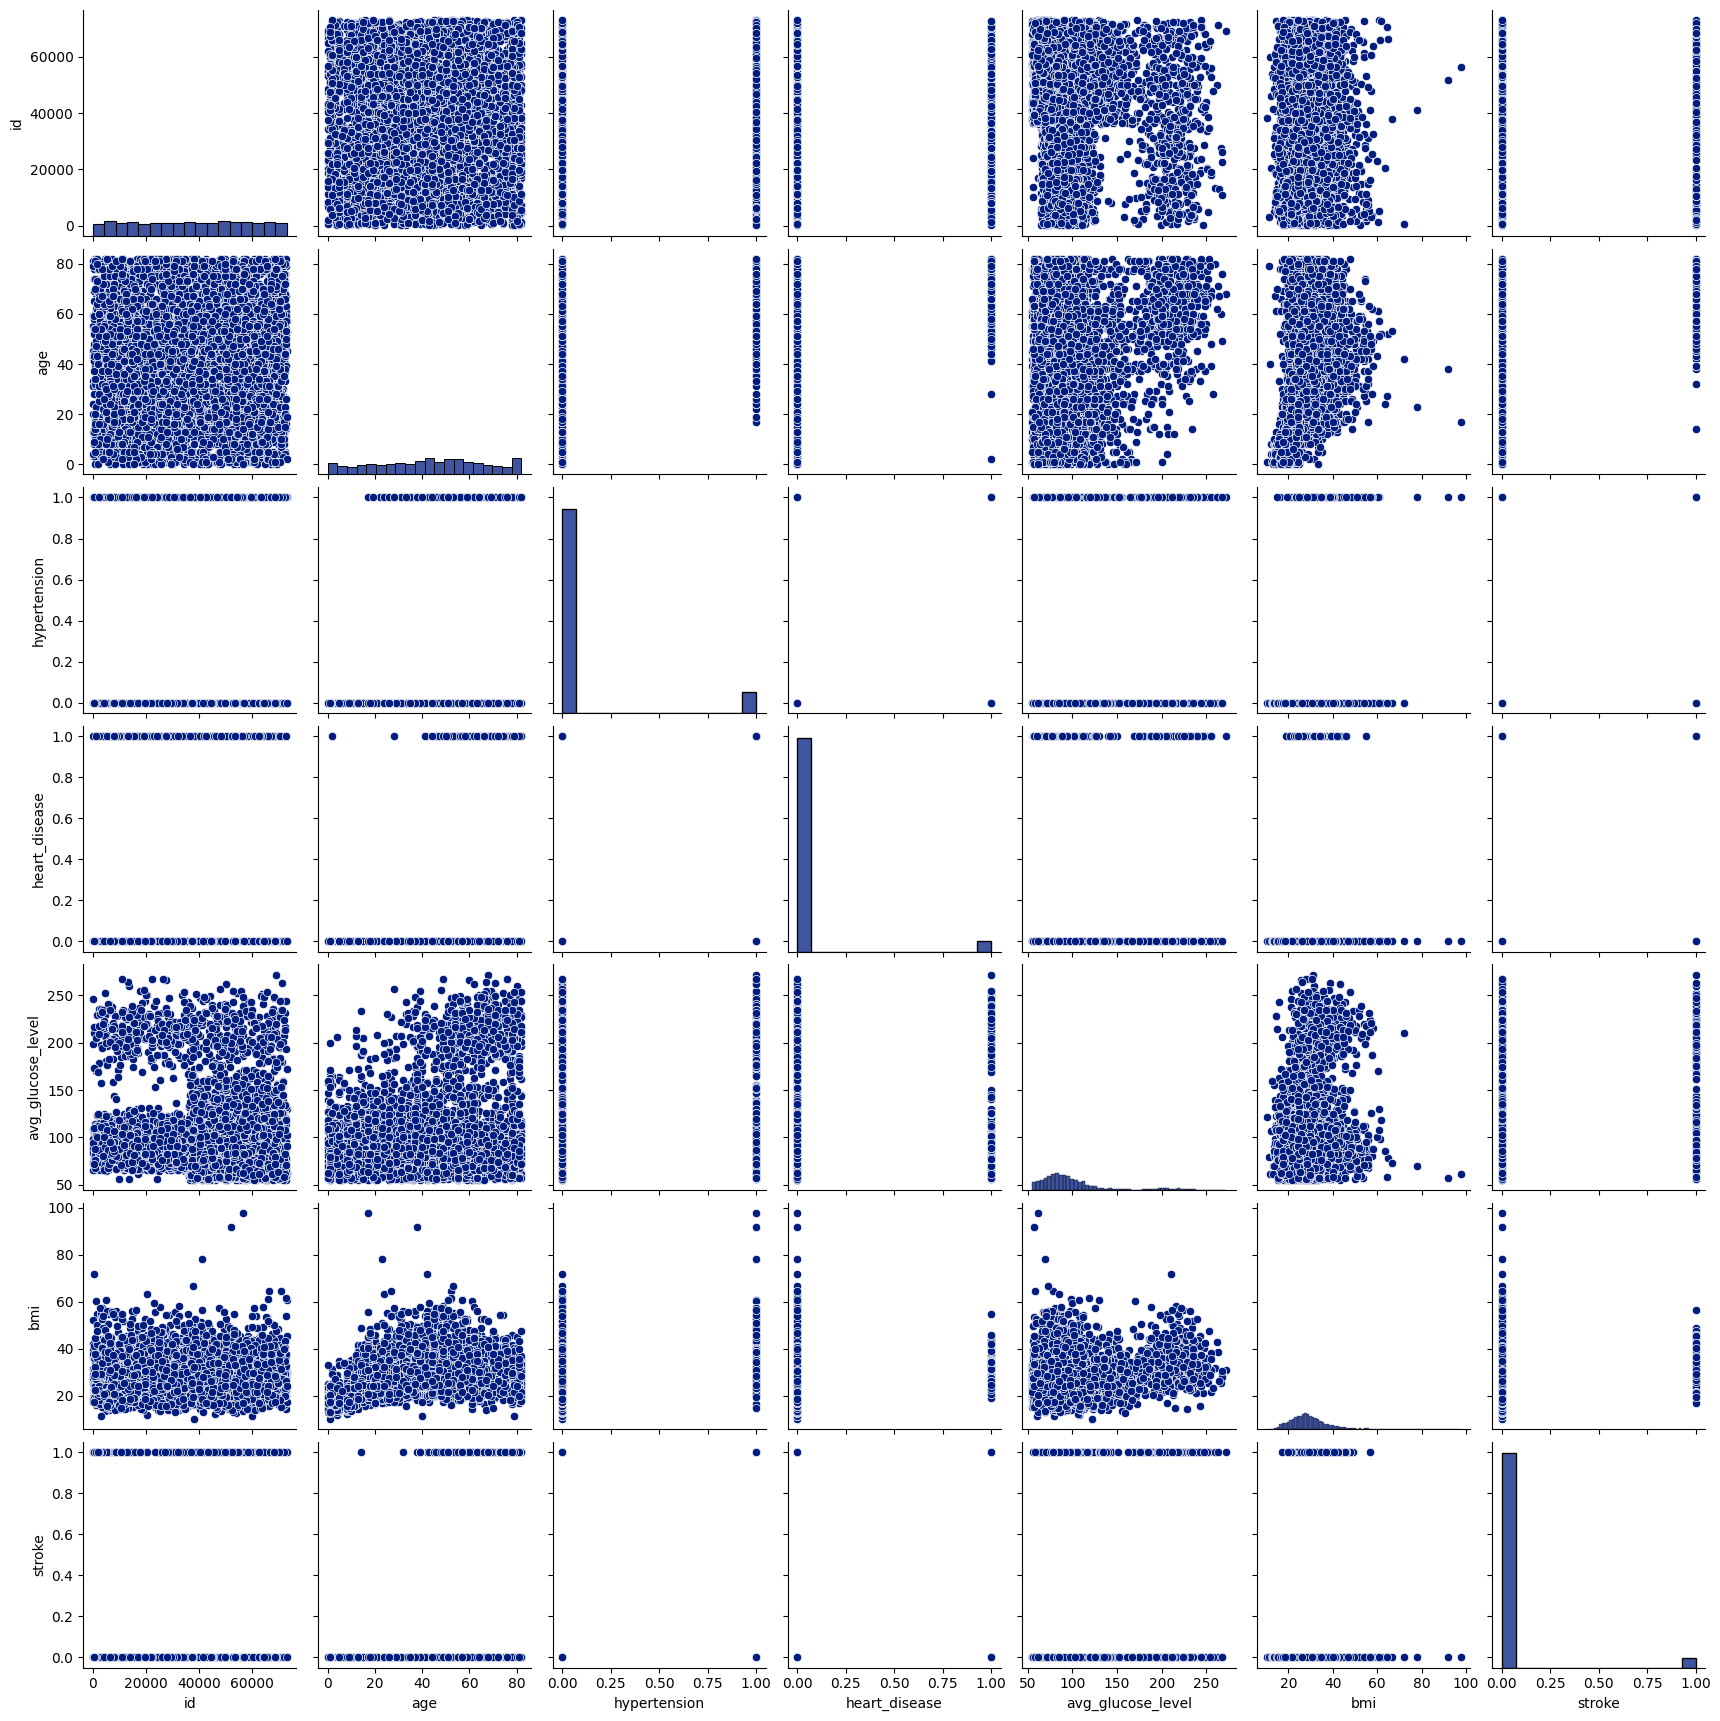

In [ ]:
sns.pairplot(df1)
plt.show()

In the process of outlier detection within the BMI distribution, values exceeding 80 have been identified as notable outliers. These extreme BMI values, indicative of morbid obesity, demand careful consideration in the analysis. The presence of such outliers signals potential anomalies or unique characteristics within the dataset, emphasizing the need for further scrutiny. Validation of the accuracy of these extreme values is imperative, as they may significantly impact statistical analyses and interpretations. Addressing these outliers will contribute to a more accurate understanding of the BMI distribution and its implications for health within the studied population.

In [ ]:
# Removing outliers
df2=df1[df1['bmi']<80]
df2.shape

(4907, 12)

### Label Encoding

In [ ]:
# Find Categorical Columns
df2.select_dtypes(include=['object']).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status' ]
label_encoder=LabelEncoder()

for i in cols:
    df2[i] = label_encoder.fit_transform(df2[i])

<ipython-input-68-620afc0e2f51>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = label_encoder.fit_transform(df2[i])
<ipython-input-68-620afc0e2f51>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = label_encoder.fit_transform(df2[i])
<ipython-input-68-620afc0e2f51>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81,0,0,1,2,1,186.21,29.0,1,1


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df2)
df_scaled=pd.DataFrame(df_scaled,columns=df2.columns)

### Correlation

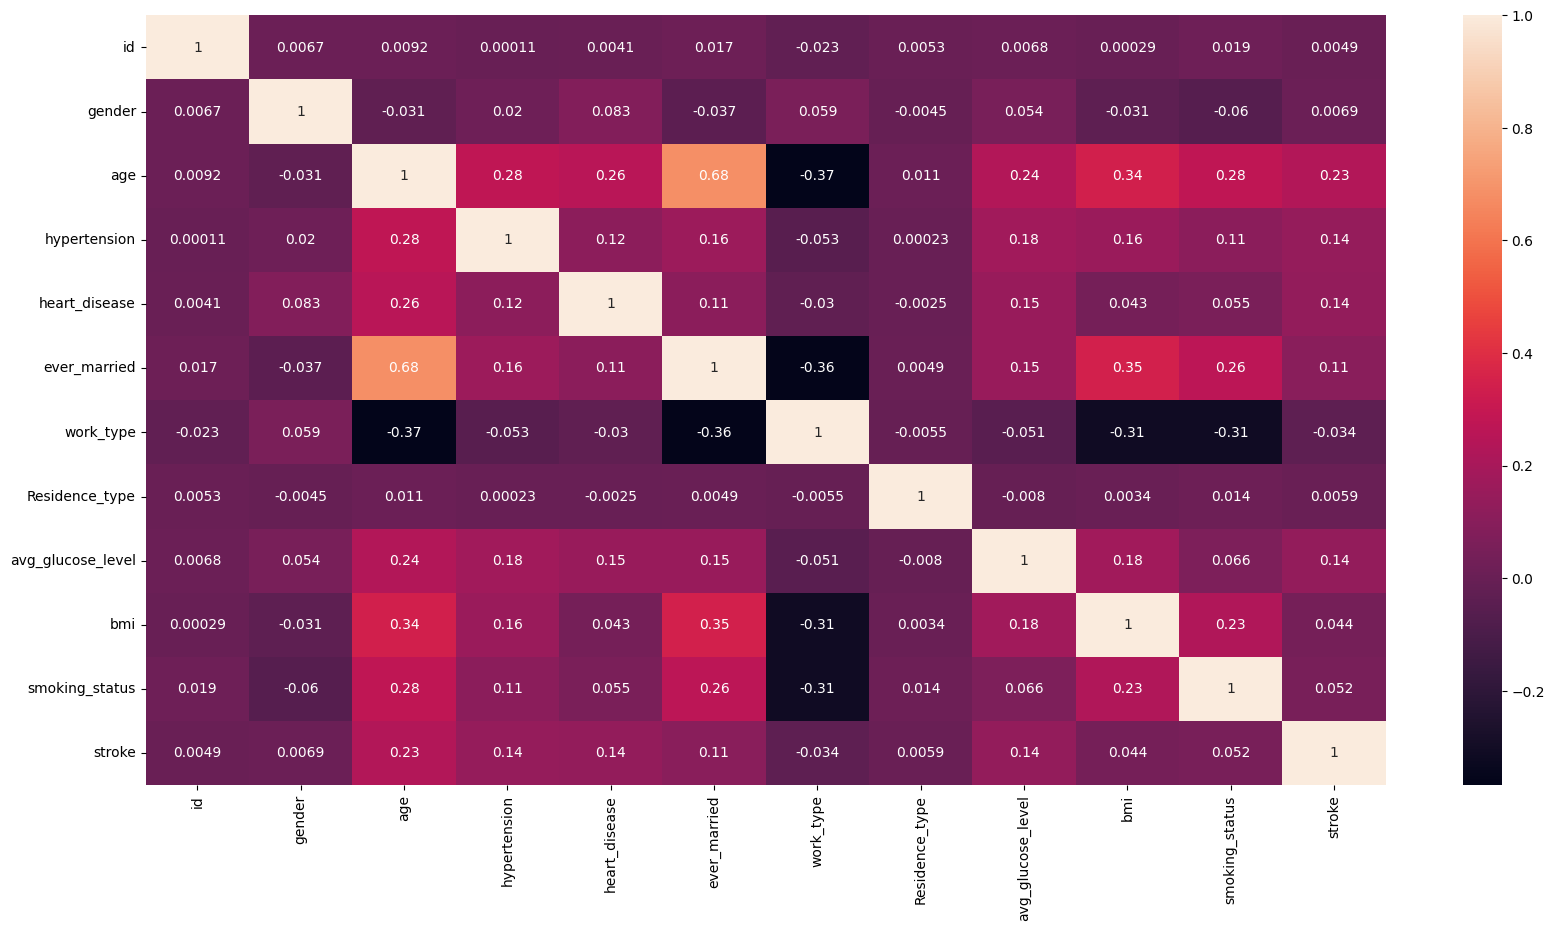

In [ ]:
corr=df_scaled.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True,)
plt.show()

Moderate Positive Correlation(as one variable increases, the other variable also increases moderately): The variable age exhibits a moderate positive correlation.

Weak Correlations(linear relationship between the two variables is weak): The variables id, gender, hypertension, heart disease, ever married, work type, residence type, avg glucose level, bmi, and smoking status show weak correlations with each other.

In [ ]:
# Drop less relevant features
data = df_scaled.drop('id', axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.817073,0.0,1.0,1.0,0.50,1.0,0.801265,0.388479,0.333333,1.0
1,0.5,0.975610,0.0,1.0,1.0,0.50,0.0,0.234512,0.327917,0.666667,1.0
2,0.0,0.597561,0.0,0.0,1.0,0.50,1.0,0.536008,0.355982,1.000000,1.0
3,0.0,0.963415,1.0,0.0,1.0,0.75,0.0,0.549349,0.202363,0.666667,1.0
4,0.5,0.987805,0.0,0.0,1.0,0.50,1.0,0.605161,0.276219,0.333333,1.0


While the initial correlation analysis indicated predominantly weak correlations between features, a deeper dive into exploratory data analysis (EDA) uncovered the nuanced importance of seemingly weakly correlated features in predicting strokes. Notably, the 'id' column was deemed less relevant and has been dropped. This underlines the significance of leveraging domain knowledge and thorough EDA to discern the true predictive power of features beyond their initial correlation values.

In [ ]:
# Splitting Training and Testing data
X=data.drop('stroke',axis=1)
y=data['stroke']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=70)

### Model Building

In [ ]:
# Define early stopping callback
early_stopping=EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [ ]:
# Initialising ANN
model=Sequential()
model.add(Dense(32, input_dim=10, activation='relu', kernel_initializer = 'uniform')) #input layer
model.add(Dense(16, activation='relu', kernel_initializer = 'uniform')) #hidden layer
model.add(Dropout(0.25))# dropout regularization
model.add(Dense(8, activation='relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='relu', kernel_initializer = 'uniform')) #output layer

# Compling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history=model.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
92/92 [==============================] - 2s 5ms/step - loss: 0.2534 - accuracy: 0.9528 - val_loss: 0.2012 - val_accuracy: 0.9606
Epoch 2/500
92/92 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9528 - val_loss: 0.1586 - val_accuracy: 0.9606
Epoch 3/500
92/92 [==============================] - 0s 5ms/step - loss: 0.1834 - accuracy: 0.9528 - val_loss: 0.1545 - val_accuracy: 0.9606
Epoch 4/500
92/92 [==============================] - 0s 5ms/step - loss: 0.1743 - accuracy: 0.9528 - val_loss: 0.1513 - val_accuracy: 0.9606
Epoch 5/500
92/92 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9528 - val_loss: 0.1511 - val_accuracy: 0.9606
Epoch 6/500
92/92 [==============================] - 0s 3ms/step - loss: 0.1667 - accuracy: 0.9528 - val_loss: 0.1515 - val_accuracy: 0.9606
Epoch 7/500
92/92 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9528 - val_loss: 0.1485 - val_accuracy: 0.9606
Epoch 8/500
9

### Evaluation

39/39 [==============================] - 0s 2ms/step


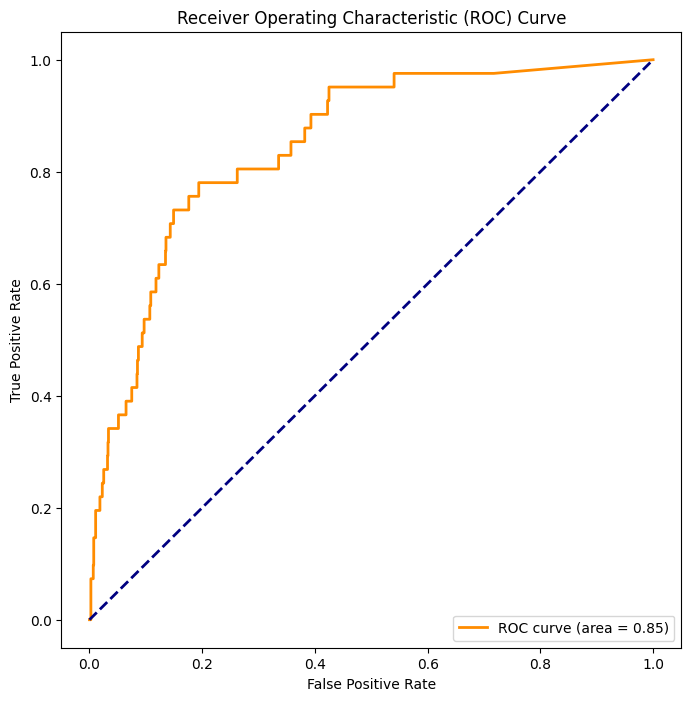

In [ ]:
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
val_accuracy=np.mean(history.history['val_accuracy'])
print('val_accuracy : ',val_accuracy)

val_accuracy :  0.960597813129425


In [ ]:
y_pred_prob = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score: ",roc_auc)

39/39 [==============================] - 0s 3ms/step
ROC AUC Score:  0.848239624892033


A ROC AUC score of 0.848 indicates a reasonably good model performance. The ROC AUC score ranges from 0 to 1, with a higher score indicating better discrimination between positive and negative instances.

### Conclusion

**In conclusion, this project on stroke prediction employs advanced artificial neural networks (ANNs) to construct a robust model for evaluating the probability of strokes based on diverse health-related features. The application of deep learning techniques facilitates the detection of intricate patterns and relationships within the dataset, enhancing the precision of the predictive tool. Evaluation metrics, such as the Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUC), play a pivotal role in gauging the model's effectiveness. With an impressive ROC AUC score of 0.848, the model demonstrates a satisfactory performance, indicating its adeptness in discriminating between positive and negative instances.**